In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# [Kaggle] House prices advanced regression techniques

In [2]:
train=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()
# test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
total=train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
percent=total/len(train)
missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [10]:
# 결측치가 10%가 넘는 열 제거
train=train.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'], axis=1)
test=test.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'], axis=1)

In [11]:
corr=train.corr()
corr.SalePrice.sort_values(ascending=False)[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

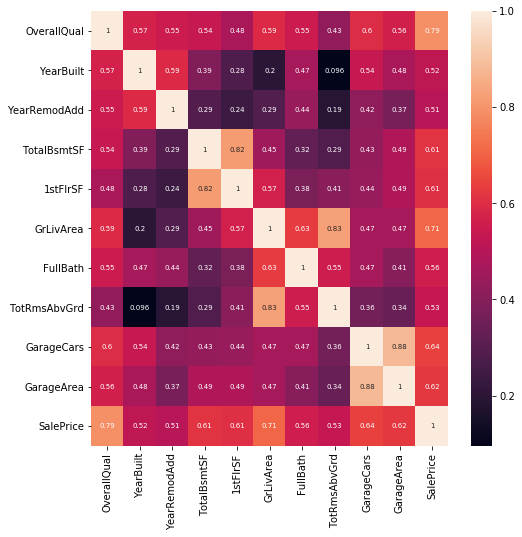

In [12]:
rev=corr.SalePrice[corr.SalePrice>0.5]
rev
rev_cols=list(rev.index.values)
rev_cols

corr2=train[rev_cols].corr()
corr2

plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, annot_kws={'size':7})

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### GarageYrBlt & GarageType & GarageFinish & GarageQual & GarageCond

In [14]:
train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [15]:
# GarageType
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
# GarageYrBlt
train['GarageYrBlt'].value_counts()
train['GarageYrBlt'].mean() # 1978
train['GarageYrBlt'].mode() # 2005.0

0    2005.0
dtype: float64

In [17]:
# GarageFinish
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

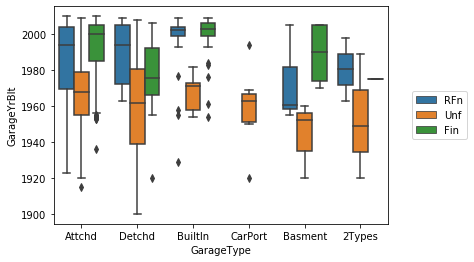

In [18]:
# GarageFinish별 GarageType x GarageYrBlt 비교
sns.boxplot(x='GarageType', y='GarageYrBlt', data=train, hue='GarageFinish')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

1968.1955555555555
0    1950.0
dtype: float64


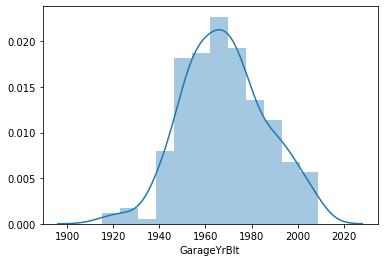

In [19]:
print(train[(train['GarageType']=='Attchd') & (train['GarageFinish']=='Unf')]['GarageYrBlt'].mean())
print(train[(train['GarageType']=='Attchd') & (train['GarageFinish']=='Unf')]['GarageYrBlt'].mode())
sns.distplot(train[(train['GarageType']=='Attchd') & (train['GarageFinish']=='Unf')]['GarageYrBlt'], kde=True)

In [20]:
# GarageQual
train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [21]:
# GarageCond
train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [22]:
# GarageType 컬럼 -> Attchd 로 보간
train['GarageType'] = train['GarageType'].fillna('Attchd')
test['GarageType'] = test['GarageType'].fillna('Attchd')

# GarageYrBlt 컬럼 -> garageyrblt_mean 로 보간
garageyrblt_mean=round(train[(train['GarageType']=='Attchd') & (train['GarageFinish']=='Unf')]['GarageYrBlt'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(garageyrblt_mean)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(garageyrblt_mean)

# GarageFinish 컬럼 -> Unf 로 보간
train['GarageFinish'] = train['GarageFinish'].fillna('Unf')
test['GarageFinish'] = test['GarageFinish'].fillna('Unf')

# GarageQual 컬럼 -> TA로 보간
train['GarageQual'] = train['GarageQual'].fillna('TA')
test['GarageQual'] = test['GarageQual'].fillna('TA')

# GarageCond 컬럼 -> TA로 보간
train['GarageCond'] = train['GarageCond'].fillna('TA')
test['GarageCond'] = test['GarageCond'].fillna('TA')

In [23]:
train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [24]:
test[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### BsmtQual & BsmtCond & BsmtExposure &  BsmtFinType1 &  BsmtFinType2

In [25]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [26]:
import random

In [27]:
bsmtqual_list = ['TA', 'Gd']
random.choice(bsmtqual_list)

'TA'

In [28]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [29]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [30]:
train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
bsmtfintype1_list = ['Unf', 'GLQ']
random.choice(bsmtfintype1_list)

'Unf'

In [32]:
train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
# BsmtQual 컬럼 -> TA와 Gd 중 랜덤으로 보간
train['BsmtQual'] = train['BsmtQual'].fillna(random.choice(bsmtqual_list))
test['BsmtQual'] = test['BsmtQual'].fillna(random.choice(bsmtqual_list))

# BsmtCont 컬럼 -> 가장 빈도수가 많은 TA로 대체
train['BsmtCond'] = train['BsmtCond'].fillna('TA')
test['BsmtCond'] = test['BsmtCond'].fillna('TA')

# BsmtExposure 컬럼 -> 가장 빈도수가 많은 No로 대체
train['BsmtExposure'] = train['BsmtExposure'].fillna('No')
test['BsmtExposure'] = test['BsmtExposure'].fillna('No')

# BsmtFinType1 컬럼 -> Unf, GLQ 중 랜덤으로 보간
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(random.choice(bsmtfintype1_list))
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(random.choice(bsmtfintype1_list))

# BsmtFinType2 컬럼 -> 가장 빈도수가 많은 Unf로 대체
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')

In [34]:
train[['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [35]:
test[['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

### MasVnrType & MasVnrArea 컬럼

In [36]:
# 결측값인 열이 같은지 확인
train[train['MasVnrType'].isnull() & train['MasVnrArea'].isnull()].count()
test[test['MasVnrType'].isnull() & test['MasVnrArea'].isnull()].count()

Id               15
MSSubClass       15
MSZoning         15
LotArea          15
Street           15
                 ..
MiscVal          15
MoSold           15
YrSold           15
SaleType         15
SaleCondition    15
Length: 74, dtype: int64

In [37]:
train.groupby(['MasVnrType'])['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [38]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [39]:
train['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [40]:
print(train['MasVnrArea'].mean())
print(train['MasVnrArea'].median())

103.68526170798899
0.0


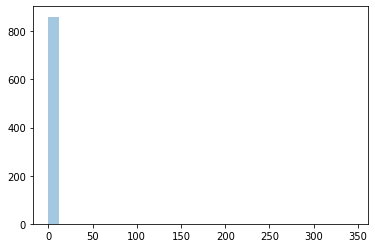

In [41]:
sns.distplot(train[train['MasVnrType']=='None']['MasVnrArea'].values, kde=False)

In [42]:
# MasVnrType 결측값 => None
train['MasVnrType']=train['MasVnrType'].fillna('None')
test['MasVnrType']=test['MasVnrType'].fillna('None')

# MasVnrArea 결측값 => 0
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
test['MasVnrArea']=test['MasVnrArea'].fillna(0)

In [43]:
train[['MasVnrType', 'MasVnrArea']].isnull().sum()
test[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

### Electrical 컬럼

In [44]:
train['Electrical'].value_counts()
test['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [45]:
# Electrical 컬럼 -> 가장 빈도수가 높은 SBrkr로 보간
train['Electrical'] = train['Electrical'].fillna('SBrkr')
test['Electrical'] = test['Electrical'].fillna('SBrkr')

In [46]:
train['Electrical'].isnull().sum()
test['Electrical'].isnull().sum()

0

In [47]:
total=train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
percent=total/len(train)
missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent


In [48]:
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [49]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [50]:
test['MSZoning']=test['MSZoning'].fillna('RL')

In [51]:
test['Utilities'].value_counts()
test['Utilities']=test['Utilities'].fillna('AllPub')

In [52]:
test['Exterior1st'].value_counts()
test['Exterior1st']=test['Exterior1st'].fillna('VinylSd')

In [53]:
test['Exterior2nd'].value_counts()
test['Exterior2nd']=test['Exterior2nd'].fillna('VinylSd')

In [54]:
test['BsmtFinSF1'].value_counts()
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)

In [55]:
test['BsmtFinSF2'].value_counts()
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(0)

In [56]:
test['BsmtUnfSF'].value_counts()
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(0)

In [57]:
test['TotalBsmtSF'].value_counts()
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(random.choice([0, 864]))

In [58]:
test['BsmtFullBath'].value_counts()
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)

In [59]:
test['BsmtHalfBath'].value_counts()
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0)

In [60]:
test['KitchenQual'].value_counts()
test['KitchenQual']=test['KitchenQual'].fillna('TA')

In [61]:
test['Functional'].value_counts()
test['Functional']=test['Functional'].fillna('Typ')

In [62]:
test['GarageCars'].value_counts()
test['GarageCars']=test['GarageCars'].fillna(2)

In [63]:
test['GarageArea'].median()
test['GarageArea']=test['GarageArea'].fillna(480.0)

In [64]:
test['SaleType'].value_counts()
test['SaleType']=test['SaleType'].fillna('WD')

In [65]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

## 데이터 표준화

In [66]:
sns.set()

In [67]:
# 왜도와 첨도
print("왜도: %f" % train['SalePrice'].skew())
print('첨도: %f' % train['SalePrice'].kurt())

왜도: 1.882876
첨도: 6.536282


In [68]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled=StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
saleprice_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

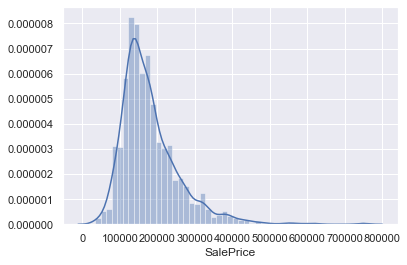

In [69]:
sns.distplot(train['SalePrice'])

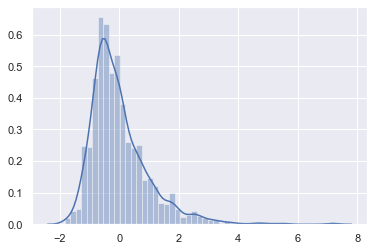

In [70]:
sns.distplot(saleprice_scaled)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


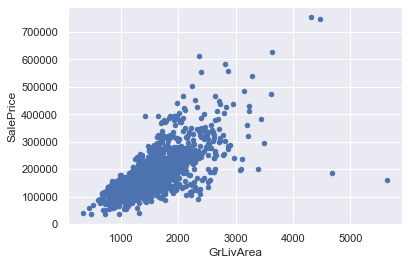

In [71]:
var='GrLivArea'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [72]:
train.sort_values(by='GrLivArea', ascending=False)[:2] #1299, 524
train=train.drop(train[train['Id']==1299].index)
train=train.drop(train[train['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


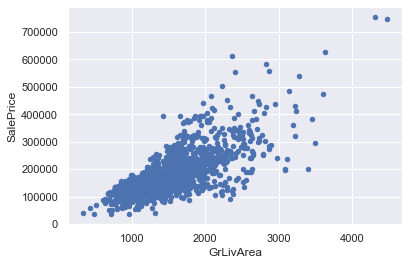

In [73]:
var='GrLivArea'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


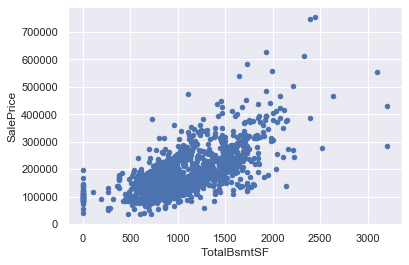

In [74]:
var='TotalBsmtSF'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [75]:
train.sort_values(by='TotalBsmtSF', ascending=False)[0:1] # 333
train=train.drop(train[train['Id']==333].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


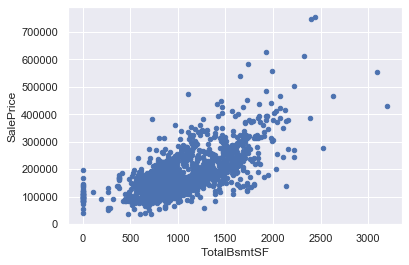

In [76]:
var='TotalBsmtSF'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

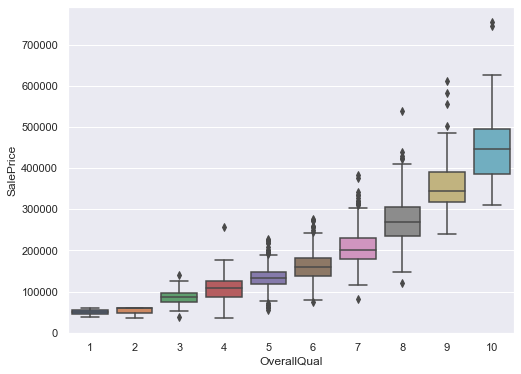

In [77]:
# 범주형 변수와 세일프라이스 간의 관계 시각화 -> boxplot
var='OverallQual'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='SalePrice', data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

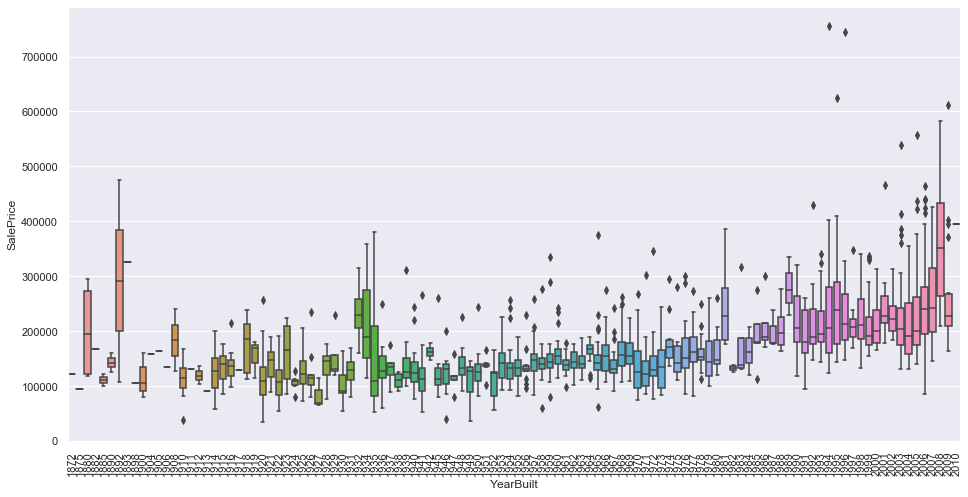

In [78]:
# 범주형 변수와 세일프라이스 간의 관계 시각화 -> boxplot
var='YearBuilt'
data=pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90)

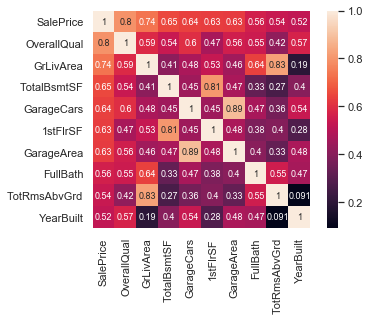

In [79]:
corrmat=train.corr()
k=10
cols=corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm=np.corrcoef(train[cols].T)
sns.heatmap(cm, annot=True, square=True, annot_kws={'size':9}, 
            xticklabels=cols.values, yticklabels=cols.values)

In [80]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


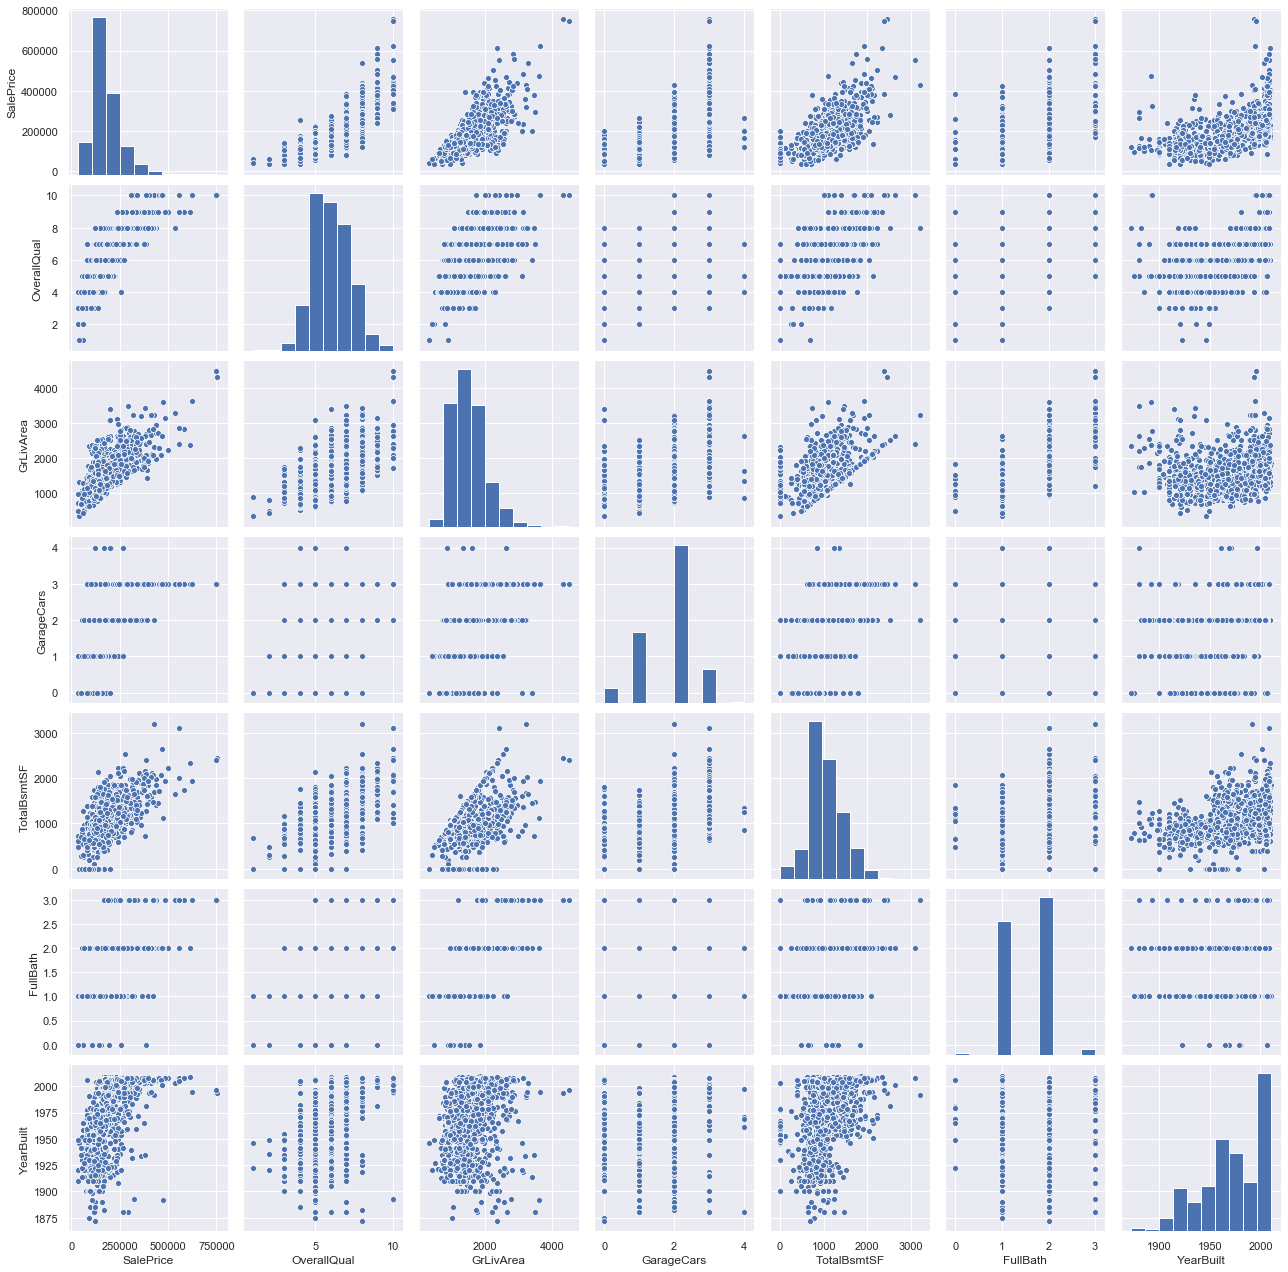

In [81]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)

In [82]:
from scipy.stats import norm
from scipy import stats

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74179.16563288086, 180862.17982155117, 0.9318046659462815))

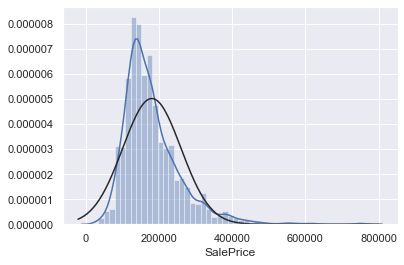

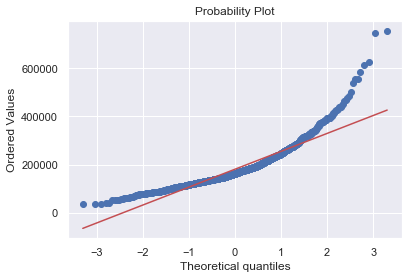

In [83]:
# 정규분포?
sns.distplot(train['SalePrice'], fit=norm)
fig=plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

In [84]:
train['SalePrice']=np.log(train['SalePrice'])

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.39841286506939283, 12.02364303237442, 0.9953589413125632))

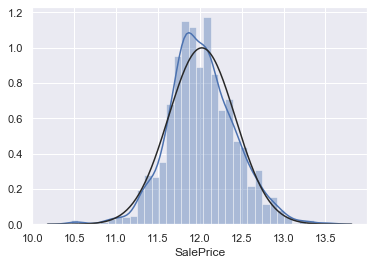

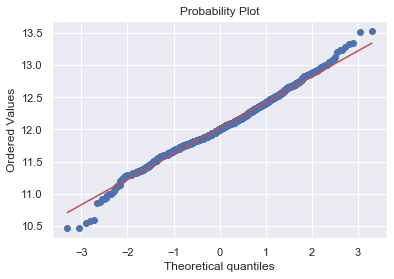

In [85]:
sns.distplot(train['SalePrice'], fit=norm)
fig=plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 2633, 3094, 3200], dtype=int64)),
 (405.4462197155407, 1051.0590253946468, 0.9842141607182623))

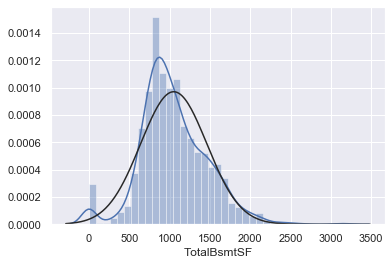

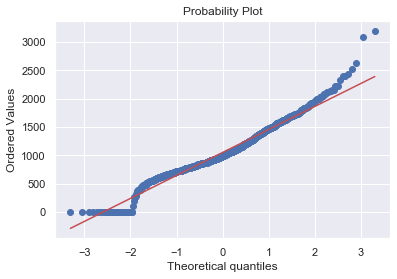

In [86]:
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig=plt.figure()
stats.probplot(train['TotalBsmtSF'], plot=plt)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([0.        , 0.        , 0.        , ..., 7.87625888, 8.03754319,
         8.07121854])),
 (0.728693899617637, 6.747408934820375, 0.6355301273118317))

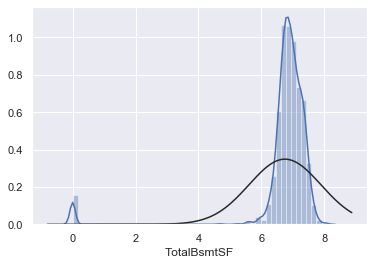

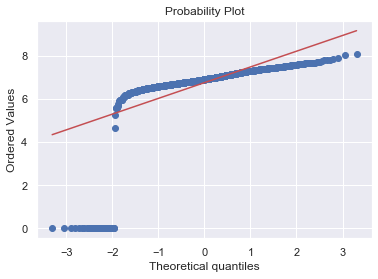

In [87]:
sns.distplot(np.log1p(train['TotalBsmtSF']), fit=norm)
fig=plt.figure()
stats.probplot(np.log1p(train['TotalBsmtSF']), plot=plt)

In [88]:
train['HasBsmt']=pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt']=0
train.loc[train['TotalBsmtSF']>0,'HasBsmt']=1
train['HasBsmt'].value_counts()

1    1420
0      37
Name: HasBsmt, dtype: int64

In [89]:
train.loc[train['HasBsmt']==1,'TotalBsmtSF']=np.log(train['TotalBsmtSF'])

C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


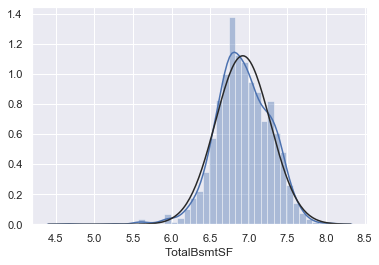

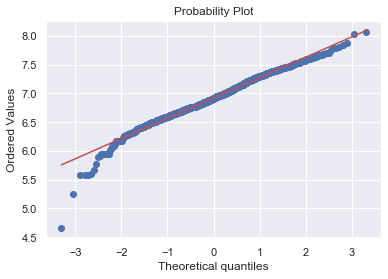

In [92]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [90]:
test['HasBsmt']=pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt']=0
test.loc[test['TotalBsmtSF']>0,'HasBsmt']=1
test['HasBsmt'].value_counts()

1    1418
0      41
Name: HasBsmt, dtype: int64

In [91]:
test.loc[test['HasBsmt']==1,'TotalBsmtSF']=np.log(test['TotalBsmtSF'])

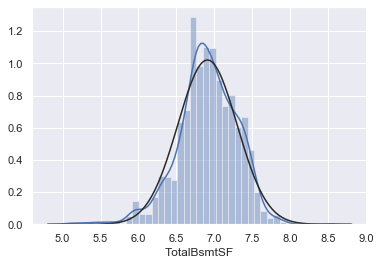

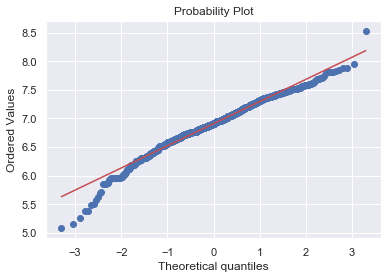

In [93]:
sns.distplot(test[test['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(test[test['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [94]:
train['MSZoning'].value_counts()

RL         1148
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

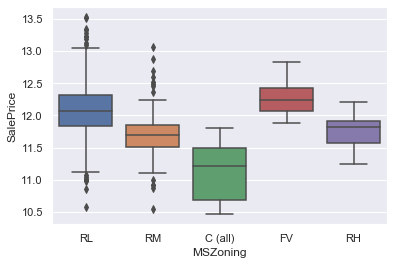

In [95]:
sns.boxplot(x='MSZoning', y='SalePrice', data=train)

In [97]:
# test.isnull().sum()[test.isnull().sum()>0]
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [104]:
train.columns[:-2] == test.columns[:-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   int64  
 2   MSZoning       1457 non-null   object 
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   LotShape       1457 non-null   object 
 6   LandContour    1457 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1457 non-null   object 
 9   LandSlope      1457 non-null   object 
 10  Neighborhood   1457 non-null   object 
 11  Condition1     1457 non-null   object 
 12  Condition2     1457 non-null   object 
 13  BldgType       1457 non-null   object 
 14  HouseStyle     1457 non-null   object 
 15  OverallQual    1457 non-null   int64  
 16  OverallCond    1457 non-null   int64  
 17  YearBuilt      1457 non-null   int64  
 18  YearRemo

In [110]:
train['BsmtFullBath'].unique()

array([1, 0, 2, 3], dtype=int64)

In [119]:
qnt = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [120]:
len(qnt)

29

In [121]:
cat=[]
for col in train.columns[1:-2]:
    if col not in qnt:
        cat.append(col)
cat

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [122]:
len(cat)

44

In [123]:
scaler=StandardScaler()

In [125]:
train[qnt]=scaler.fit_transform(train[qnt])
test[qnt]=scaler.fit_transform(test[qnt])

In [128]:
train_cat=pd.get_dummies(train[cat])
test_cat=pd.get_dummies(test[cat])

In [129]:
train_cat

,MSSubClass,LowQualFinSF,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,1,0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,1,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,60,0,1,0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,70,0,1,0,3,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,60,0,1,0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,0,0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,20,0,1,0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1457,70,0,0,0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1458,20,0,1,0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [130]:
test_cat

,MSSubClass,LowQualFinSF,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,0,0.0,0.0,2,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,60,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,60,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,120,0,0.0,0.0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,0,0.0,0.0,3,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,160,0,0.0,0.0,3,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,20,0,1.0,0.0,4,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1457,85,0,0.0,1.0,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [131]:
missing_col = []

for col in train_cat.columns:
    if col not in test_cat.columns:
        missing_col.append(col)

missing_col

['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex']

In [132]:
for m in missing_col:
    test_cat[m]=0

In [133]:
test_cat

,MSSubClass,LowQualFinSF,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Other,Heating_Floor,Heating_OthW,Electrical_Mix,GarageQual_Ex
0,20,0,0.0,0.0,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,60,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60,0,0.0,0.0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,120,0,0.0,0.0,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,0,0.0,0.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,160,0,0.0,0.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,20,0,1.0,0.0,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1457,85,0,0.0,1.0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# train 데이터
train_final=pd.concat([train[qnt], train_cat], axis=1)
test_final=pd.concat([test[qnt],test_cat], axis=1)

train_final.shape, test_final.shape

((1457, 268), (1459, 268))

In [149]:
train_final.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.203851,0.659665,-0.517875,1.053722,0.880958,0.524711,0.618690,-0.287639,-0.943644,0.005146,...,0,0,0,1,0,0,0,0,1,0
1,-0.087208,-0.067364,2.176923,0.159157,-0.427458,-0.570030,1.247451,-0.287639,-0.639964,0.344386,...,0,0,0,1,0,0,0,0,1,0
2,0.080148,0.659665,-0.517875,0.987458,0.832498,0.334807,0.110133,-0.287639,-0.300022,0.068159,...,0,0,0,1,0,0,0,0,1,0
3,-0.092280,0.659665,-0.517875,-1.861898,-0.718217,-0.570030,-0.514005,-0.287639,-0.059797,-0.103419,...,0,0,0,1,1,0,0,0,0,0
4,0.385447,1.386693,-0.517875,0.954326,0.735578,1.384864,0.500797,-0.287639,-0.173111,0.259360,...,0,0,0,1,0,0,0,0,1,0


In [150]:
test_final.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Other,Heating_Floor,Heating_OthW,Electrical_Mix,GarageQual_Ex
0,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063936,0.517537,-0.649392,0.056030,...,0,0,0,0,0,0,0,0,0,0
1,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063714,-0.297689,-0.338322,0.396268,...,0,0,0,0,0,0,0,0,0,0
2,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773668,-0.297689,-0.953599,0.098221,...,0,0,0,0,0,0,0,0,0,0
3,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.358376,-0.297689,-0.525879,0.096430,...,0,0,0,0,0,0,0,0,0,0
4,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.386513,-0.297689,1.059203,0.365092,...,0,0,0,0,0,0,0,0,0,0


## Random Forest Regressor 모델

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [174]:
x=train_final
y=train['SalePrice']

In [175]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [176]:
model=RandomForestRegressor(n_estimators=300 ,n_jobs=-1, random_state=0)
model.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [177]:
model.score(xtrain, ytrain)

0.982875149058031

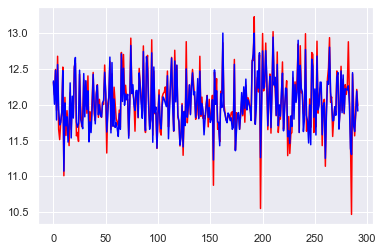

In [179]:
ypred=model.predict(xtest)
plt.plot(ytest.values, color='red')
plt.plot(ypred, color='blue')

## Submission

In [180]:
predictions=model.predict(test_final)

In [181]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [182]:
sample['SalePrice']=np.exp(predictions)

In [183]:
sample

,Id,SalePrice
0,1461,122474.337399
1,1462,154536.729291
2,1463,180694.330816
3,1464,173352.710510
4,1465,182650.235833
...,...,...
1454,2915,84579.902011
1455,2916,88390.926210
1456,2917,156715.595518
1457,2918,116534.474916


In [184]:
sample.to_csv('house_submission.csv', index=False)